In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

merged = pd.read_csv(r"~\Desktop\School Related\PDS-Assignment-1\Assignment 2\After Cleansing\Merged.csv")
merged = merged[merged.year >= 2000]
# merged

In [10]:
total = merged[["year", "sex","nus", "total", "type"]]
total

,year,sex,nus,total,type
54,2000,F,11341,20023,enroll
55,2000,MF,21233,39193,enroll
56,2000,M,9892,19170,enroll
57,2001,F,11781,21156,enroll
58,2001,MF,22172,41078,enroll
59,2001,M,10391,19922,enroll
60,2002,MF,22169,42524,enroll
61,2002,M,10516,20620,enroll
62,2002,F,11653,21904,enroll
63,2003,F,11036,21415,enroll


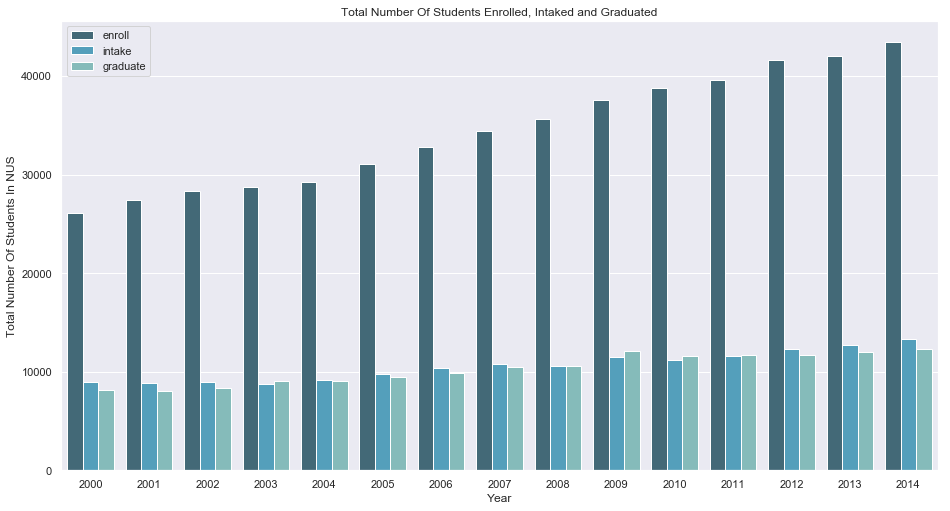

In [5]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(15.7,8.27)})
barplot = sns.barplot(x="year", y="total", hue= "type", data=total, palette="GnBu_d", ci=None)
barplot.set(xlabel='Year', ylabel='Total Number Of Students In NUS', 
            title="Total Number Of Students Enrolled, Intaked and Graduated")
plt.legend(loc='upper left')
plt.show(barplot)

In [11]:
intake_grad = total[total.type !="enroll"]
intake_grad = intake_grad[intake_grad.sex != "MF"].sort_values("year").reset_index(drop = True)
intake_grad

,year,sex,nus,total,type
0,2000,F,3437,7326,intake
1,2000,F,3161,6601,graduate
2,2000,M,2697,5553,graduate
3,2000,M,2984,6092,intake
4,2001,F,3534,7377,intake
5,2001,M,2524,5380,graduate
6,2001,F,3051,6671,graduate
7,2001,M,2945,5869,intake
8,2002,M,2767,5999,intake
9,2002,F,3252,7390,intake


In [13]:
import plotly.express as px
fig = px.box(intake_grad, x="type", y="total", color="sex",
             notched = True, # used notched shape
             title="Number Of Students Intaked & Graduated Based On Genders In NUS Over The Years",
             hover_data = ["year"],
             points = "all")
fig.show()

In [64]:
medians = intake_grad.groupby(['type',"sex"])["total"].mean()
for value in medians:
    value = int(value)
print(medians)
# print("Difference For Female: {.:1f}".format((medians[3]-medians[0])/medians[3] * 100))
print(" Female: {}% , Boys : {}%".format(int((medians[2]-medians[0])/medians[2] * 100), int((medians[3]-medians[1])/medians[3] * 100))) 

type      sex
graduate  F      8283.600000
          M      7141.400000
intake    F      8515.133333
          M      7374.066667
Name: total, dtype: float64
 Female: 2% , Boys : 3%
